In [1]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import fitstools
from pathlib import PurePath
import glob
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from astropy.io.fits import getheader
import astropy.io.fits as fits

plt.rcParams.update({'font.size': 16})
dpi = 168

In [2]:
datadir = PurePath('C:\Data\STEREO\L7tum')
outputdir = PurePath('C:\Data\STEREO\L7tum\\figures')
datafiles = sorted(glob.glob(str(PurePath(datadir, '*.fts.gz'))))
nfiles = len(datafiles)
nfiles2 = 200
print(nfiles, datafiles[0])

798 C:\Data\STEREO\L7tum\20140414_024600_14c2A.fts.gz


vmin = 1e-20 ; vmax = 1.45e-12


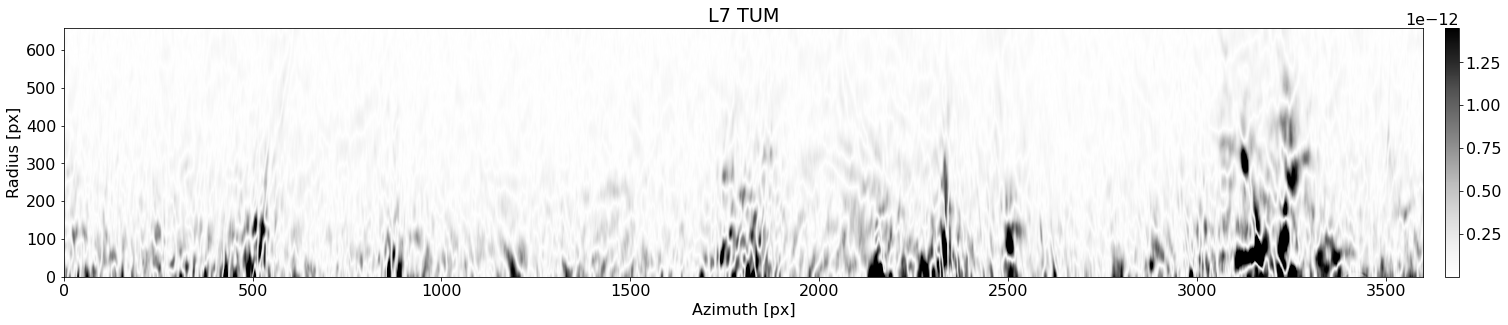

In [3]:
i=0

sample = np.abs(fitstools.fitsread(datafiles[i], cube=False, astropy=True))
sampleN = np.abs((sample - sample.mean())/sample.std())

vmin = 1e-20# sample.min()
vmax = 1.45e-12#0.2*sample.max()
print(f'vmin = {vmin} ; vmax = {vmax}') 

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(25,10))
splt = plt.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys')
plt.title('L7 TUM')
plt.xlabel('Azimuth [px]')
plt.ylabel('Radius [px]')
# position for the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
cbar = plt.colorbar(splt, cax = cax)
# cax.set_ylabel('[units of stand. dev.]', fontsize=16, labelpad=20)

#plt.tight_layout()
# fig.savefig(PurePath(outputdir, f'L7tum_{i:04d}.png'))
# plt.close()

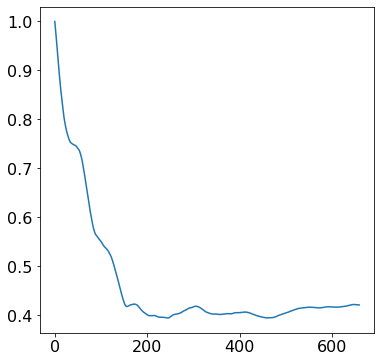

In [4]:
rp = sampleN.mean(axis=1)
rp = rp - rp.min() + 1
rp = rp / rp.max()
rp2d = np.tile(rp[:, np.newaxis], (1, sample.shape[1]))
rp2d.shape

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plt.plot(rp)

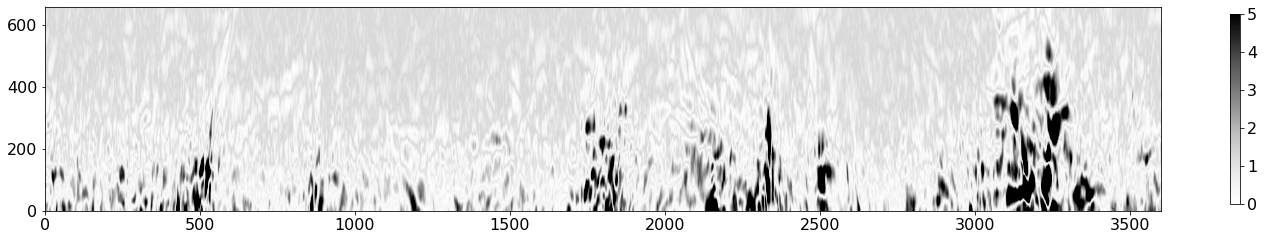

In [5]:
sampleN2 = sampleN/rp2d
#sampleN2 = np.abs((sampleN2 - sampleN2.mean())/sampleN2.std())

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(25,10))
splt = plt.imshow(sampleN2, vmin=0, vmax=5, origin='lower', cmap='Greys')
fig.colorbar(splt,ax=ax, shrink=0.35)

In [6]:
dcube = np.array([fitstools.fitsread(fpath, cube=False, astropy=True) for fpath in datafiles[0:400:2]])

In [7]:
dcubeTmed = np.nanmedian(np.abs(dcube), axis=0)
print(dcubeTmed.shape)

(659, 3600)


In [8]:
dcubeTmean = np.nanmean(np.abs(dcube), axis=0)

In [9]:
np.nanmean(dcubeTmed), np.nanmin(dcubeTmed), np.nanmax(dcubeTmed), np.nanstd(dcubeTmed)

(1.0902260403921108e-13,
 8.428475505220753e-15,
 1.985717711763799e-12,
 1.2802855155729595e-13)

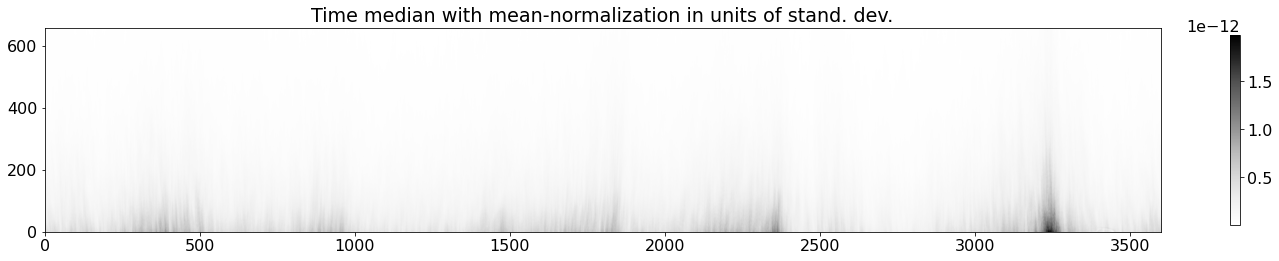

In [10]:
# dcubeTmed2 = np.abs((dcubeTmed - np.nanmean(dcubeTmed))/np.nanstd(dcubeTmed))
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(25,10))
splt = plt.imshow(dcubeTmed, origin='lower', cmap='Greys')
plt.title('Time median with mean-normalization in units of stand. dev.')
fig.colorbar(splt,ax=ax, shrink=0.35)

2.0489861554923197e-14 5.171392000579506e-13


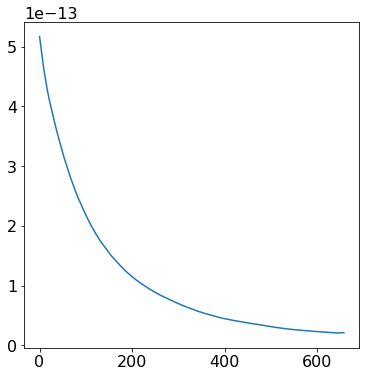

In [11]:
#dcubeTmed2 = np.abs((dcubeTmed - np.nanmean(dcubeTmed))/np.nanstd(dcubeTmed))
rprofile = dcubeTmed.mean(axis=1)

rprofile2d = np.tile(rprofile[:, np.newaxis], (1, sample.shape[1]))
rprofile2d.shape

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plt.plot(rprofile)
print(rprofile.min(), rprofile.max())

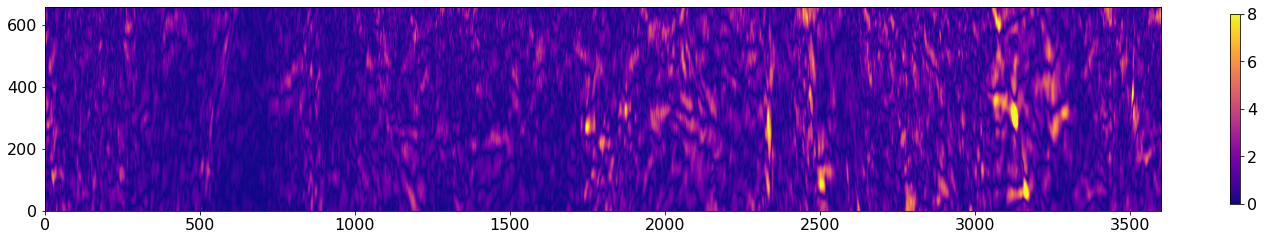

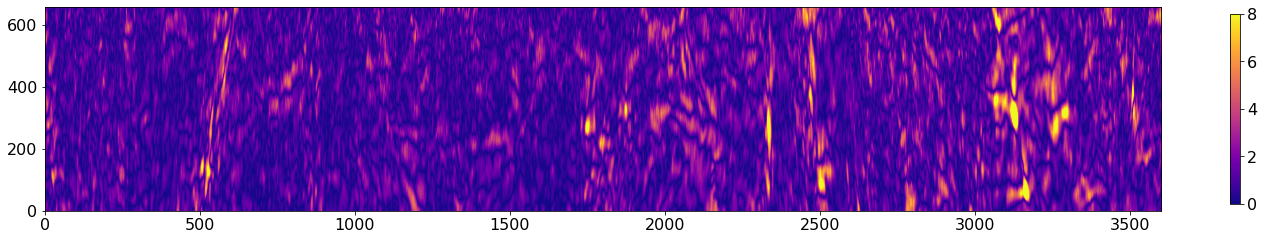

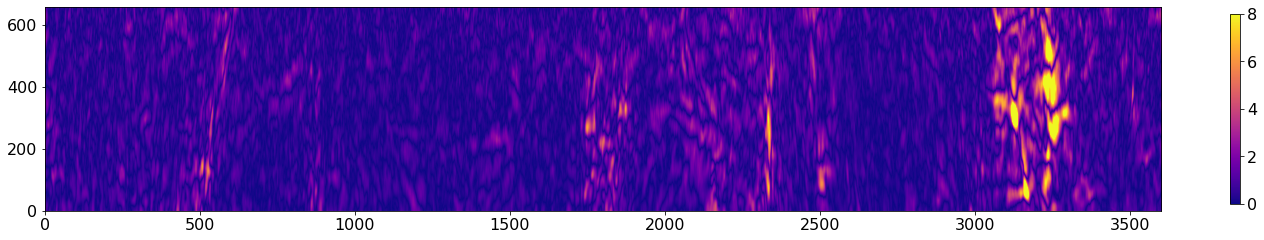

In [12]:
sampleTmean = sample/dcubeTmean
sampleNmean =(sampleTmean - sampleTmean.mean())/sampleTmean.std()
sampleNmean = sampleNmean - sampleNmean.min()

sampleTmed = sample/dcubeTmed
sampleNmed = (sampleTmed - sampleTmed.mean())/sampleTmed.std()
sampleNmed = sampleNmed - sampleNmed.min()

sampleTprof = sample/rprofile2d
sampleNprof = (sampleTprof - sampleTprof.mean())/sampleTprof.std()
sampleNprof = sampleNprof - sampleNprof.min()

vmin = 0
vmax = 8
cmap='plasma'
# mean
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(25,10))
splt = plt.imshow(sampleNmean, vmin=vmin, vmax=vmax, origin='lower', cmap=cmap)
fig.colorbar(splt,ax=ax, shrink=0.35)
# median
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(25,10))
splt = plt.imshow(sampleTmed, vmin=vmin, vmax=vmax, origin='lower', cmap=cmap)
fig.colorbar(splt,ax=ax, shrink=0.35)
# profile
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(25,10))
splt = plt.imshow(sampleNprof, vmin=vmin, vmax=vmax, origin='lower', cmap=cmap)
fig.colorbar(splt,ax=ax, shrink=0.35)

In [13]:
plt.close('all')

FS = 12
plt.rcParams.update({'font.size': FS})
vmin = 0
vmax = 4
cmap = 'Greys'
sample = np.abs(fitstools.fitsread(datafiles[i], cube=False, astropy=True))
sampleTmed = sample/dcubeTmed
sample_median = np.median(sampleTmed)
sample_std = np.std(sampleTmed)
sampleN2 = (sampleTmed - sample_median)/sample_std
sample_min = sampleN2.min()

# i = 199
for i in range(0, nfiles2):

    sample, hdr = fitstools.fitsread(datafiles[i], cube=False, astropy=True, header=True)
    sample = np.abs(sample)
    if i == 79:
        sample_0 = np.abs(fitstools.fitsread(datafiles[i-1], cube=False, astropy=True))
        sample_2 = np.abs(fitstools.fitsread(datafiles[i+1], cube=False, astropy=True))
        sample = 0.5*(sample_0 + sample_2)
        
    sampleN = (sample - sample.mean())/sample.std()

    sampleTmed = sample/dcubeTmed
    sampleN2 = (sampleTmed - sample_median)/sample_std
    sampleN2 = sampleN2 - sample_min

    fits.writeto(PurePath(datadir, 'prep_fits', f'prep_{i:04d}.fits'), sampleN2, overwrite=True)
    
    date_obs = hdr['DATE-OBS'][:-4]
    # vmin = 1e-20# sample.min()
    # vmax = 1.45e-12#0.2*sample.max()
    fig, axs= plt.subplots(nrows=2, ncols=1, figsize=(1920/dpi, 1080/dpi), dpi=dpi)
    splt0 = axs[0].imshow(sample, vmin=1e-14, vmax=1.5e-12, origin='lower', cmap=cmap)
    axs[0].set_title(f'L7 TUM - {date_obs} - Frame #{i}', fontsize=FS)
    # axs[0].set_xlabel('Azimuth [px]')
    axs[0].set_ylabel('Radius [px]')
    # # position for the colorbar
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='1%', pad=0.3)
    # # Adding the colorbar
    cbar = plt.colorbar(splt0, cax = cax)
    cax.set_ylabel(r'scaled radiance [$B_{\odot}$]', fontsize=FS, labelpad=20)

    splt1 = axs[1].imshow(sampleN2, vmin=vmin, vmax=vmax, origin='lower', cmap=cmap)
    axs[1].set_title('Flat-fielded radially', fontsize=FS)
    axs[1].set_xlabel('Azimuth [px]')
    axs[1].set_ylabel('Radius [px]')
    # position for the colorbar
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes('right', size='1%', pad=0.3)
    # Adding the colorbar
    cbar = plt.colorbar(splt1, cax = cax)
    cax.set_ylabel('norm. rad. [units of std.]', fontsize=FS, labelpad=20)
    plt.tight_layout()
    fig.savefig(PurePath(outputdir, f'L7tum_{i:04d}.jpg'), dpi=dpi) #
    plt.close()